# Part I - (Ford GoBike System Data Exploration)
## by (Adelami Niyi Victor)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area as at february 2019. It has a total of 183412 rows and 16 columns. it contains the following variables:



    1.  duration_sec: How long was the ride in seconds 
    2.  start_time: When the ride started
    3.  end_time: When the ride ended
    4.  start_station_id: The unique id for the station where the bike was picked for a ride
    5.  start_station_name: The name of the station where the bike was picked for a ride
    6.  start_station_latitude: The latitude of the station where the bike was picked for a ride
    7.  start_station_longitude: The longitude of the station where the bike was picked for a ride
    8.  end_station_id: The unique id for the station where the bike was dropped (where the ride ended)
    9.  end_station_name: The name of the station where the bike was dropped (where the ride ended)
    10. end_station_latitude: The latitude of the station where the bike was dropped (where the ride ended)
    11. end_station_longitude: The longitude of the station where the bike was dropped (where the ride ended)
    12. bike_id: The unique id of each bike
    13. user_type: The categories of people that use the buke
    14. member_birth_year: The year of birth for registered members/users
    15. member_gender: The gender of registered members/users
    16. bike_share_for_all_trip: Indicates whether the bike is used for alt trips or for last mile
    

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
fordGo_df = pd.read_csv('201902_fordgobike_tripdata.csv')

### Assessing dataset

In [3]:
# Checking the number of rows and columns
print("The FordGod dataset has {} rows and {} columns".format(fordGo_df.shape[0], fordGo_df.shape[1]))

The FordGod dataset has 183412 rows and 16 columns


In [4]:
#Checking the variables in the dataset
fordGo_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
# Randomly checking a sample of 50 datapoints to understand the dataset
fordGo_df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
105487,1036,52:39.4,09:56.3,126.0,Esprit Park,37.761634,-122.390648,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2820,Subscriber,1952.0,Male,No
151998,332,41:02.0,46:34.5,27.0,Beale St at Harrison St,37.788059,-122.391865,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4977,Subscriber,1966.0,Male,No
134855,394,41:09.5,47:43.9,26.0,1st St at Folsom St,37.787290,-122.394380,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5360,Subscriber,1980.0,Female,No
93690,319,26:37.4,31:56.6,163.0,Lake Merritt BART Station,37.797320,-122.265320,200.0,2nd Ave at E 18th St,37.800214,-122.253810,2983,Subscriber,1971.0,Male,No
1830,121,45:19.8,47:21.1,195.0,Bay Pl at Vernon St,37.812314,-122.260779,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4916,Subscriber,1989.0,Male,No
101167,1028,36:19.4,53:28.2,13.0,Commercial St at Montgomery St,37.794231,-122.402923,364.0,China Basin St at 3rd St,37.772000,-122.389970,1846,Subscriber,1986.0,Female,No
104281,368,46:10.4,52:18.4,345.0,Hubbell St at 16th St,37.766483,-122.398279,124.0,19th St at Florida St,37.760447,-122.410807,4800,Subscriber,1993.0,Female,No
170380,938,08:36.7,24:15.3,115.0,Jackson Playground,37.765026,-122.398773,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5554,Subscriber,1978.0,Male,No
132776,606,10:59.7,21:06.6,343.0,Bryant St at 2nd St,37.783172,-122.393572,126.0,Esprit Park,37.761634,-122.390648,4949,Subscriber,1990.0,Male,No
120321,1260,55:47.3,16:47.5,377.0,Fell St at Stanyan St,37.771917,-122.453705,74.0,Laguna St at Hayes St,37.776435,-122.426244,1902,Customer,1980.0,Male,No


###### Observations from the sampled data
* The start_time and end_time variables  are not properly formatted
* The start_station_id and end_station_id are not in proper format
* member_birth_year is not properly formatted 

In [6]:
# Checking the datatypes of each avriables in the dataset
fordGo_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

###### Observations
* stat_station_id should be float
* end_station_id should be float
* member_birth_year should be int

In [7]:
# checking the unique values to dected variables that should be made categorical values
fordGo_df.nunique()

duration_sec                4752
start_time                 35783
end_time                   35767
start_station_id             329
start_station_name           329
start_station_latitude       334
start_station_longitude      335
end_station_id               329
end_station_name             329
end_station_latitude         335
end_station_longitude        335
bike_id                     4646
user_type                      2
member_birth_year             75
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

###### Observation
> user_type, member_gender and bike_share_for_all_trip columns should be in categorical data type

In [8]:
#checking the summary statistics of the dataset
fordGo_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


###### information from the summary statistics
* The duration has a mean of 726.078435 seconds, maximum of 85444 seconds, minimum of 61 seconds, and 50 percent of the data falls in between 514 seconds
* The member_birth_year variable has 2001 as the most recent, 1878 as the oldest and a 50% of the user falls in the range of 1987

> It is obvious that the oldest value is an outlier 

In [9]:
#Checking for null variables in the dataset
fordGo_df[fordGo_df['end_station_name'].isna() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,55:53.9,24:23.7,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,32:34.3,53:46.7,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,10:46.5,13:09.4,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,28:45.9,38:31.3,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,30:17.1,38:46.3,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,03:04.5,27:12.3,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,59:46.0,04:55.4,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,17:37.7,28:37.0,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,33:55.1,07:28.9,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


>The dataset has at least 197 rows of null values 

In [10]:
fordGo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender all have data with incomplete values 

In [11]:
# Checking for unique values in the member birth year to detect outliers 
np.sort(fordGo_df.member_birth_year.unique())

array([1878., 1900., 1901., 1902., 1910., 1920., 1927., 1928., 1930.,
       1931., 1933., 1934., 1938., 1939., 1941., 1942., 1943., 1944.,
       1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001.,   nan])

1878., 1900., 1901., 1902., 1910., 1920., 1927., 1928., 1930. seems to be outliers in this dataset

In [12]:
#further exaamining the member_birth_year
fordGo_df.member_birth_year.value_counts().tail(30)

1954.0    301
1952.0    189
1951.0    180
1950.0    178
1953.0    158
1947.0    135
1955.0    134
1945.0    105
1949.0     99
1931.0     89
1900.0     53
1948.0     51
2001.0     34
1943.0     30
1942.0     21
1933.0     20
1946.0     19
1939.0     11
1902.0     11
1941.0      9
1901.0      6
1938.0      3
1920.0      3
1944.0      2
1934.0      2
1928.0      1
1927.0      1
1910.0      1
1930.0      1
1878.0      1
Name: member_birth_year, dtype: int64

In [13]:
# Checking for duplicates in dataset
assert fordGo_df.duplicated().sum() == 0

There is no duplicate rows in the dataset

In [14]:
# make a copy of the dataset for further investigation
clean_fordGo_df = fordGo_df.copy()

### Quality issues

1. start_station_id is float instead of int
2. end_station_id is float instead of int
3. member_birth_year is float instead of int
4. Dataset contains missing data
5. The time format for start_time, end_time are not correct

### Tidieness issues

1. There are some variables that are not needed in this exploration
2. The start_time and the end_time needs to be dropped 

# Cleaning dataset

#### Define 
Create a column with age range

#### Code

In [15]:
# Create age range for user data
bins = [1870, 1940, 1950, 1960, 1970, 1980, 1990, 2002]
age_range = ["80", '70', '60', '50', '40', '30', '20s']
clean_fordGo_df['age_range'] = pd.cut(clean_fordGo_df.member_birth_year, bins, labels=age_range)

#### test

In [16]:
clean_fordGo_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'age_range'],
      dtype='object')

#### Define
Drop unnecessary variables 

#### Code

In [17]:
drop_columns = ['start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id']
clean_fordGo_df.drop(drop_columns, axis=1, inplace=True)

#### Test

In [18]:
clean_fordGo_df.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip', 'age_range'],
      dtype='object')

#### Define 
drop rows with missing values 

In [19]:
clean_fordGo_df[clean_fordGo_df['member_birth_year'].isnull() == True]


,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_range
1,42521,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,Customer,NaN,NaN,No,NaN
13,915,252.0,Channing Way at Shattuck Ave,244.0,Shattuck Ave at Hearst Ave,Subscriber,NaN,NaN,No,NaN
28,650,258.0,University Ave at Oxford St,263.0,Channing Way at San Pablo Ave,Customer,NaN,NaN,No,NaN
53,3418,11.0,Davis St at Jackson St,11.0,Davis St at Jackson St,Customer,NaN,NaN,No,NaN
65,926,13.0,Commercial St at Montgomery St,81.0,Berry St at 4th St,Subscriber,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...
183354,449,244.0,Shattuck Ave at Hearst Ave,253.0,Haste St at College Ave,Customer,NaN,NaN,No,NaN
183356,795,368.0,Myrtle St at Polk St,125.0,20th St at Bryant St,Subscriber,NaN,NaN,No,NaN
183363,673,75.0,Market St at Franklin St,133.0,Valencia St at 22nd St,Customer,NaN,NaN,No,NaN
183371,196,58.0,Market St at 10th St,75.0,Market St at Franklin St,Customer,NaN,NaN,No,NaN


In [20]:
clean_fordGo_df = clean_fordGo_df.dropna()

#### Test

In [21]:
clean_fordGo_df[clean_fordGo_df['member_birth_year'].isnull() == True]

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_range


In [22]:
clean_fordGo_df[clean_fordGo_df['member_gender'].isnull() == True]

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_range


#### Define 
Change `duration_sec` and `member_birth_year` to integer

#### Code

In [23]:
type_change = ['duration_sec' , 'member_birth_year' ]
for t in type_change:
    clean_fordGo_df[t] = clean_fordGo_df[t].astype('int')
# Format start_time and end_time to time object
    

#### Test

In [24]:
clean_fordGo_df.dtypes

duration_sec                  int32
start_station_id            float64
start_station_name           object
end_station_id              float64
end_station_name             object
user_type                    object
member_birth_year             int32
member_gender                object
bike_share_for_all_trip      object
age_range                  category
dtype: object

#### Define
Convert `member_gender` and `bike_share_for_all_trip` from object data type to category

#### Code

In [25]:
clean_fordGo_df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
gender_category = pd.api.types.CategoricalDtype(['Male', 'Female','Other'], ordered=True)
trip_category = pd.api.types.CategoricalDtype(['Yes', 'No'], ordered=True)
category_type = {'member_gender':gender_category, 'bike_share_for_all_trip':trip_category}
for key, value in category_type.items():
    clean_fordGo_df[key] = clean_fordGo_df[key].astype(value)
    

#### Test

In [27]:
clean_fordGo_df.dtypes

duration_sec                  int32
start_station_id            float64
start_station_name           object
end_station_id              float64
end_station_name             object
user_type                    object
member_birth_year             int32
member_gender              category
bike_share_for_all_trip    category
age_range                  category
dtype: object

### What is the structure of your dataset?

> The dataset has a total of 183412 rows and 16 columns. It contains the following variables:

* start_time, end_time, start_station_name, end_station_name, user_type, member_gender and bike_share_for_all_trip, which are all object type
* start_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, member_birth_year, member_gender and bike_share_for_all_trip which are objects
* duration_sec and bike_id are integer



### What is/are the main feature(s) of interest in your dataset?

> Analysis in this project will focus on factors that determines the duration of ride

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration_sec, station_name, and user_type, member_birth_year, member_gender and bike_share_for_all_trip will be very pivotal for the analysis of this dataset

## Univariate Exploration


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Question
###### How long does the average trip take?
Check the distribution of the duration_sec

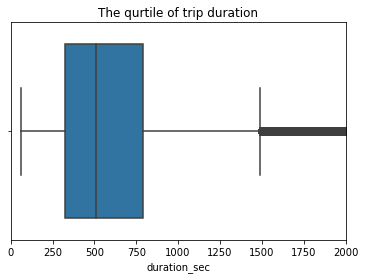

In [28]:
sb.boxplot(data=clean_fordGo_df, x='duration_sec');
plt.xlim(0, 2000)
plt.title('The qurtile of trip duration');

> The mean duration for all trips is 500 seconds 

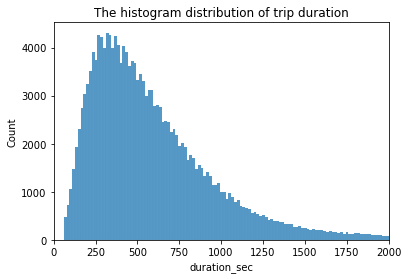

In [29]:
sb.histplot(data=clean_fordGo_df, x='duration_sec')
plt.xlim(0, 2000)
plt.title('The histogram distribution of trip duration');

* The histogram is right skewed, showing that there might be some outliers on the right.

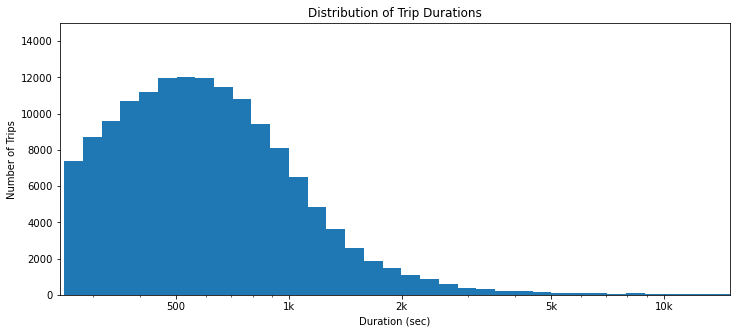

In [30]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(clean_fordGo_df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = clean_fordGo_df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([245, 15000, 0, 15000])
plt.show()

* The distribution shows that most trips takes about 250 to 750 seconds 
* The histogram is right skewed, showing that there might be some outliers on the right.

### Question
##### What is the distribution of different genders in the dataset

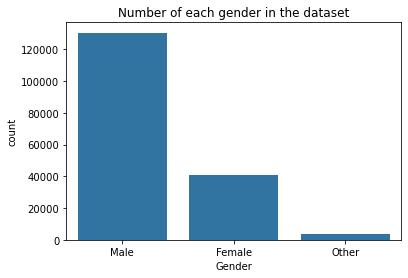

In [31]:
base_color = sb.color_palette()[0]
sb.countplot(data=clean_fordGo_df, x='member_gender', color=base_color, order=['Male', 'Female', 'Other'])
plt.xlabel('Gender')
plt.title('Number of each gender in the dataset');

* There are more Male in the dataset 
* More than 120,000 users are male, about 40,000 are female and less than 20,000 are others 

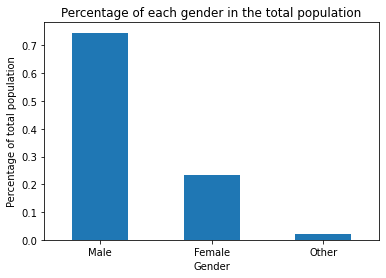

In [32]:
gender_percent = clean_fordGo_df.member_gender.value_counts(normalize=True)
gender_percent.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage of total population')
plt.title('Percentage of each gender in the total population')
plt.xticks(rotation=0);

* More than 70% of the dataset is male, about 20% are female while others takes the rest of the dasat

### Question
##### Which of the user_type use bike share more

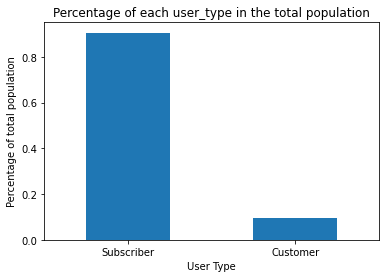

In [33]:
user_percent = clean_fordGo_df.user_type.value_counts(normalize=True)
user_percent.plot(kind='bar')
plt.xlabel('User Type')
plt.ylabel('Percentage of total population')
plt.title('Percentage of each user_type in the total population')
plt.xticks(rotation=0);


* The subscribers use the bike share more than the customers, they have more than 90% of the total population 

### Question
###### How often does users use the bike sare for all trips 

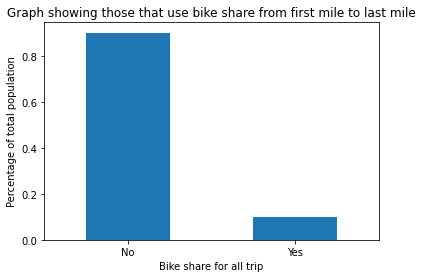

In [34]:
share_percent = clean_fordGo_df.bike_share_for_all_trip.value_counts(normalize=True)
share_percent.plot(kind='bar')
plt.xlabel('Bike share for all trip')
plt.ylabel('Percentage of total population')
plt.title('Graph showing those that use bike share from first mile to last mile')
plt.xticks(rotation=0);



* More than 90% of the trips are not shared for all trips. Therefore, they are majorly used as last mile means of transportation

### Question
###### Which age group is known for using bike share

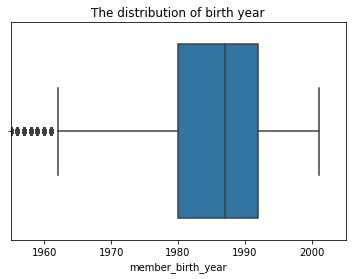

In [35]:
sb.boxplot(data=clean_fordGo_df, x='member_birth_year');
plt.title('The distribution of member birth year')
plt.xlim(1955, 2005)
plt.title('The distribution of birth year');

* Most of the bike share users are born between 1980 and 1993

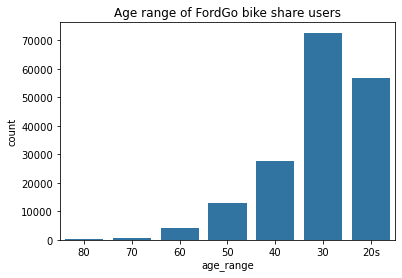

In [36]:
sb.countplot(data=clean_fordGo_df, x='age_range', color=base_color);
plt.title("Age range of FordGo bike share users");

* The bike share is more common among people within 40 to 20 years but most common among people in their 30s


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
* The trip duration_sec column is right skewed and has outliers, using logarith scale, I was able to get a better visualization for the histogram plotted with the column 
* The member_birth_year variable had outliers that made the percentile difficult to view, I used plt.xlim to zoom in on the plot in the boxplot 
* Because of the outliers in the member_birth_year, while creating the age_range using pd.cut() I grouped the outliers under 80 years. 


## Bivariate Exploration

#### Questions
* How long does the average trip take?
* Does the above depend on user_type?
* Does the above depend on user gender?
* What is the bike share rate between different age range

> * What is the bike share rate between different age range and gender

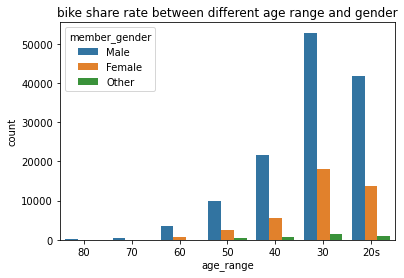

In [37]:
sb.countplot(data=clean_fordGo_df, x = 'age_range', hue='member_gender');
plt.title('bike share rate between different age range and gender')
plt.show()

* This graph indicates that the highest number of bike users among different age_range are male, then followed by female, then others 

### Question
* What is the bike share rate between different gender and user_type

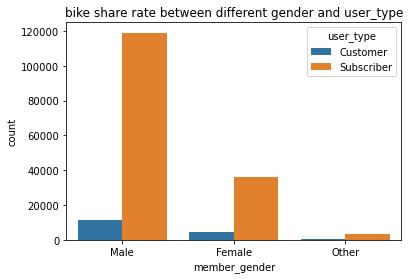

In [38]:
sb.countplot(data=clean_fordGo_df, x = 'member_gender', hue='user_type');
plt.title('bike share rate between different gender and user_type')
plt.show()

* Among different genders, subscribers are more than customers

In [39]:
clean_fordGo_df.member_gender.dtypes

CategoricalDtype(categories=['Male', 'Female', 'Other'], ordered=True)

### Question
> What is the mean duration of bike share among different genders

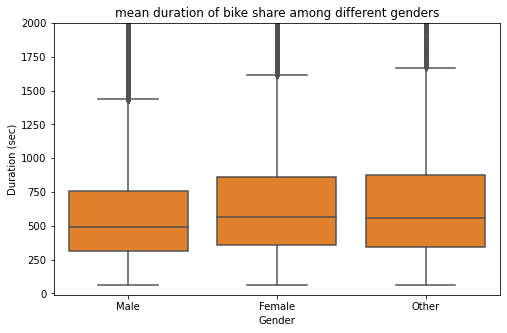

In [40]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data=clean_fordGo_df, x='member_gender', y='duration_sec', color=base_color);
plt.ylim([-10, 2000])
plt.xlabel("Gender")
plt.title('mean duration of bike share among different genders')
plt.ylabel('Duration (sec)');

* The male has lesser mean duration in sec

### Question
> What is the mean duration of bike share among different user_types

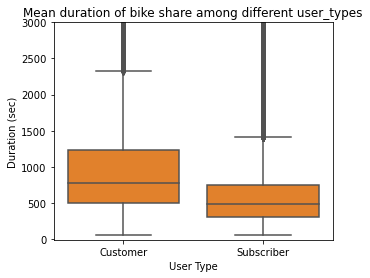

In [41]:
plt.figure(figsize = [5, 4])
base_color = sb.color_palette()[1]
sb.boxplot(data=clean_fordGo_df,  x='user_type', y='duration_sec', color=base_color);
plt.ylim([-10, 3000])
plt.xlabel("User Type")
plt.title('Mean duration of bike share among different user_types')
plt.ylabel('Duration (sec)');

* Customers have a higher mean duration (sec) than subscribers

### Question
> What is the mean duration of bike share among different age_range

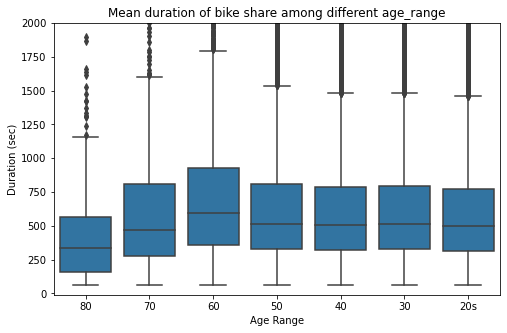

In [42]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=clean_fordGo_df,  x='age_range', y='duration_sec', color=base_color);
plt.ylim([-10, 2000])
plt.xlabel("Age Range")
plt.ylabel('Duration (sec)')
plt.title('Mean duration of bike share among different age_range');

* People in their 60s ride longer than others 

### Question
> Among which of the age group is bike share most common

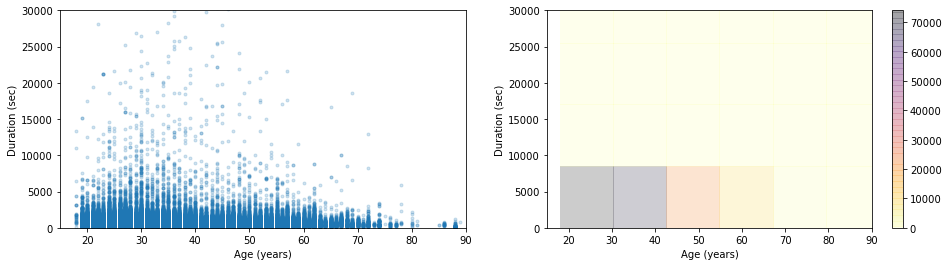

In [43]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.scatter((2019 - clean_fordGo_df.member_birth_year), 
            clean_fordGo_df.duration_sec, marker='.',
           alpha = 0.2)
plt.xlim(15, 90)
plt.ylim(0, 30000)
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)')

plt.subplot(1,2,2)
plt.hist2d((2019 - clean_fordGo_df.member_birth_year), 
            clean_fordGo_df.duration_sec, alpha = 0.2,  cmap = 'inferno_r')
plt.colorbar()
plt.xlim(15, 90)
plt.ylim(0, 30000)
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)')
plt.show()

* We have record of more people in their 20 to 45 in the dataset 
* Long ride is more common among the younger users than the elderly ones 
* We can also see that most frequent bike users are around age 20 to 45

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* This graph indicates that the highest number of bike users among different age_range are male, then followed by female, then others but the male gender has lesser mean duration
* Among different genders, subscribers are more than customers
* Customers drive longer than subscribers on average
* We have record of more people in their 20 to 45 in the dataset
* Long ride is more common among the younger users than the elderly ones
* We can also see that most frequent bike users are around age 20 to 45

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Plotting a boxplot of age and duration shows that people in their 60s ride longer mean duration although they are not much in the dataset
* I expected male to have a longer ride time because they have more population of users but the female take more longer trips

## Multivariate Exploration

### Question
> What is the relationship between user_type, duration of ride and birth_year

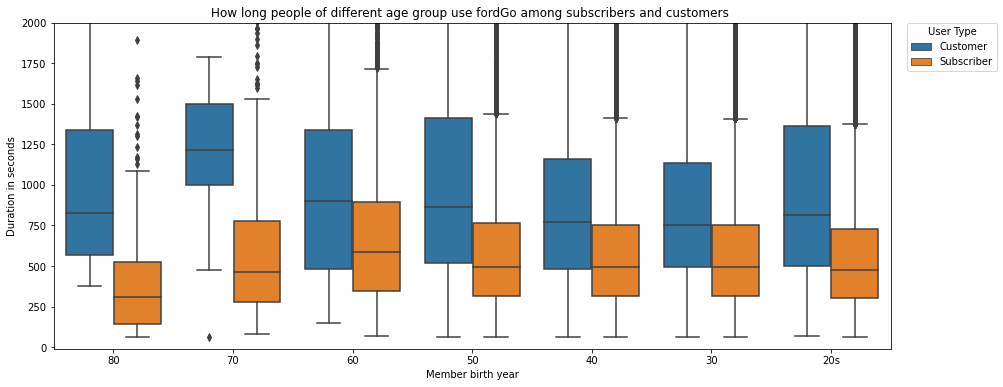

In [44]:
plt.figure(figsize=(15, 6))
sb.boxplot(data=clean_fordGo_df, x = clean_fordGo_df.age_range, y = 'duration_sec', hue = 'user_type')
plt.ylim([-10, 2000])
plt.xlabel('Member birth year')
plt.ylabel('Duration in seconds')
plt.title('How long people of different age group use fordGo among subscribers and customers ')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='User Type')
plt.show()

In [45]:
clean_fordGo_df.groupby(['age_range','user_type']).describe()['duration_sec']

count         mean          std    min      25%  \
age_range user_type                                                       
80        Customer       13.0   991.307692   581.679234  378.0   568.00   
          Subscriber    190.0   410.431579   371.824193   61.0   141.75   
70        Customer       17.0  1231.647059   643.534473   63.0  1001.00   
          Subscriber    632.0   682.841772  1095.252804   81.0   278.50   
60        Customer      280.0  1273.753571  1606.371630  146.0   480.25   
          Subscriber   3828.0   718.803814   607.288271   66.0   349.00   
50        Customer     1199.0  1299.478732  1633.263799   64.0   520.50   
          Subscriber  11698.0   675.998290  1495.514593   63.0   317.00   
40        Customer     2407.0  1304.908184  3398.198900   63.0   481.00   
          Subscriber  25380.0   650.320173  1359.454688   61.0   314.00   
30        Customer     7467.0  1250.983394  3424.495449   62.0   495.00   
          Subscriber  65181.0   645.240269  1435.114927   61.0   317.00   
20s       Customer     5183.0  1404.933629  3731.124782   66.0   503.00   
          Subscriber  51477.0   616.253472  1115.167563   61.0   302.00   

                         50%      75%      max  
age_range user_type                             
80        Customer     829.0  1336.00   2129.0  
          Subscriber   307.5   524.50   1893.0  
70        Customer    1213.0  1496.00   3054.0  
          Subscriber   466.0   780.50  18658.0  
60        Customer     901.0  1338.00  11613.0  
          Subscriber   584.0   897.00  16602.0  
50        Customer     865.0  1415.00  20093.0  
          Subscriber   493.0   765.75  83195.0  
40        Customer     770.0  1162.00  65409.0  
          Subscriber   492.0   753.00  74097.0  
30        Customer     756.0  1134.50  83519.0  
          Subscriber   496.0   754.00  84548.0  
20s       Customer     815.0  1365.00  82512.0  
          Subscriber   477.0   731.00  67512.0

* Although the subscribers are more than the customers but the have less mean duration than customers
* The age_range 70 of the user type has the highest mean duration with about 1231
* Another reason for this occurence might be because, compared to othere age range, age range 60 to 80 are not well represented in the dataset. There is not enough data on the age group compared to other age groups, this might distort the fact. There is a need for further investigation on this 

### Question
> What is the relationship between user_type, age_range and bike_share_for_all_trip

[]

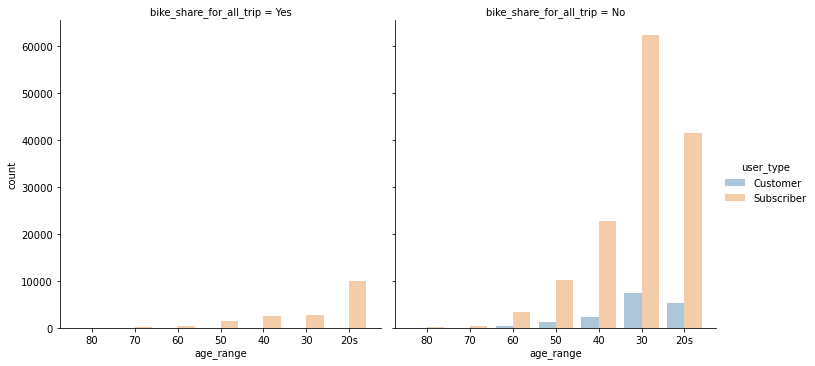

In [46]:
sb.catplot(data=clean_fordGo_df, 
           x = 'age_range', 
           col = 'bike_share_for_all_trip', 
           hue = 'user_type', 
           alpha=0.4, kind="count")
plt.plot()

> There are lesser bike share for all trips

### Question
> What is the relationship between gender, agr_range and duration

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


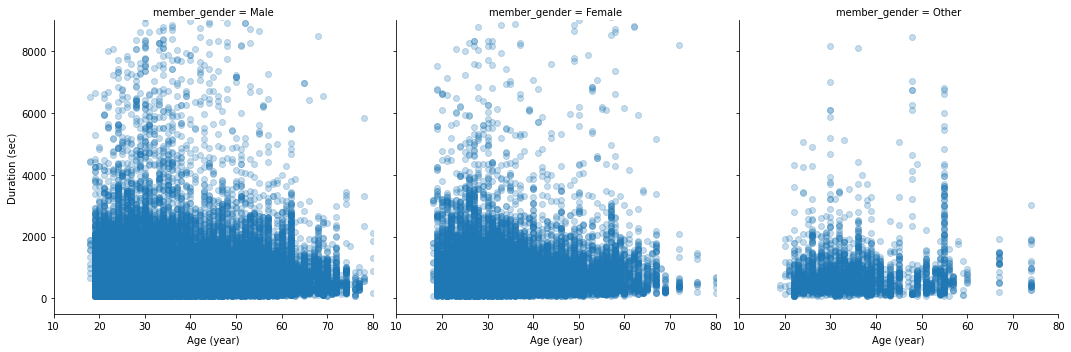

In [47]:
clean_fordGo_df['age'] = (2019 - clean_fordGo_df['member_birth_year'])
g = sb.FacetGrid(data = clean_fordGo_df, 
                 col = 'member_gender', 
                 size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')

plt.show()

* From age 60, jump in age is very obvious in other gender 
* The Male and Female follow the similar trend in trip duration

### Question
> What is the relationship between user_type, age_range and duration

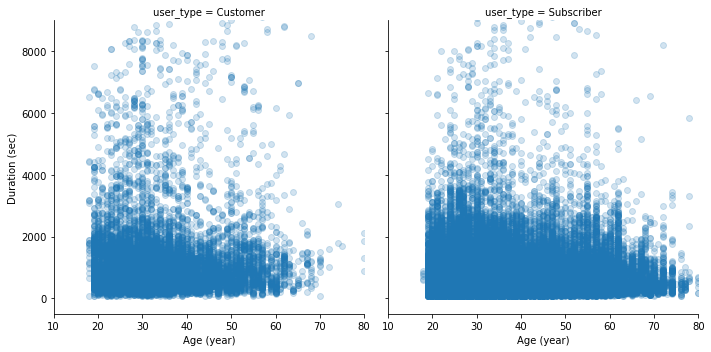

In [48]:
clean_fordGo_df['age'] = (2019 - clean_fordGo_df['member_birth_year'])
g = sb.FacetGrid(data = clean_fordGo_df, col = 'user_type', size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.2)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')

plt.show()

* They both share similar trend 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* Short duration rides looks more prevalent among subscribers
* The subscribers are more than the customers but ride less time than customers

### Were there any interesting or surprising interactions between features?


## Conclusions

* Customer user type trips take a longer duration compared to subscriber user type.
* Most trips takes an average of 500 seconds 
* More than 90% of the trips are not shared for all trips. Therefore, they are majorly used as last mile means of transportation
* There are more subscribers and male in the dataset than customers, female and others 
* Although there are less people in the age range of 60 but they tend to have more mean trip duration than others
* The male rider have lesser mean duration compared with other riders

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [ ]:
!jupyter nbconvert Ford_GoBike_System_Part_II.ipynb --to slides --post serve --no-input --no-prompt